In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# reading the file
file = "Savola_et_al_2020_DR_with_injury_and_infection_stressors_CSV_Data.csv"
try:
    data = pd.read_csv(file)
except Exception:
    print("File not found, there is an error loading the file")

In [24]:
data.tail()

,Date,Vial,Treat,Protein,Rep,Dead,Smurf,Eggs,Unhatched,Hatch,NG
44738,141,45,Control,10,5,0.0,0.0,NaN,NaN,NaN,NaN
44739,141,47,Control,10,7,0.0,0.0,NaN,NaN,NaN,NaN
44740,142,45,Control,10,5,1.0,0.0,0.0,0.0,0.0,NaN
44741,142,47,Control,10,7,0.0,0.0,NaN,NaN,NaN,NaN
44742,143,47,Control,10,7,1.0,0.0,0.0,0.0,0.0,NaN


In [25]:
data.dtypes

Date           int64
Vial           int64
Treat         object
Protein        int64
Rep            int64
Dead         float64
Smurf        float64
Eggs         float64
Unhatched    float64
Hatch        float64
NG           float64
dtype: object

In [26]:
data.describe()

,Date,Vial,Protein,Rep,Dead,Smurf,Eggs,Unhatched,Hatch,NG
count,44743.000000,44743.000000,44743.000000,44743.000000,44716.000000,44716.000000,27229.000000,27228.000000,27228.000000,5117.000000
mean,48.168652,278.024339,32.427396,10.360570,0.012702,0.002773,10.706893,10.492765,0.291354,33.100815
std,31.258735,167.108962,22.020595,5.788094,0.111988,0.052587,16.288343,16.117589,2.146554,25.202581
min,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.060000
25%,22.000000,131.000000,14.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.580000
50%,45.000000,269.000000,31.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.230000
75%,71.000000,393.000000,55.000000,15.000000,0.000000,0.000000,16.000000,16.000000,0.000000,60.000000
max,143.000000,600.000000,65.000000,20.000000,1.000000,1.000000,139.000000,139.000000,69.000000,60.000000


In [27]:
null_counts = data.isnull().sum()

In [28]:
print(null_counts)

Date             0
Vial             0
Treat            0
Protein          0
Rep              0
Dead            27
Smurf           27
Eggs         17514
Unhatched    17515
Hatch        17515
NG           39626
dtype: int64


In [29]:
total_null_values = null_counts.sum()

In [30]:
print(total_null_values)

92224


In [31]:
column_with_most_nulls = null_counts.idxmax()
max_null_count = null_counts.max()

In [32]:
print(max_null_count)

39626


In [33]:
data

,Date,Vial,Treat,Protein,Rep,Dead,Smurf,Eggs,Unhatched,Hatch,NG
0,1,1,Control,3,1,0.0,0.0,0.0,0.0,0.0,NaN
1,1,2,Control,3,2,0.0,0.0,0.0,0.0,0.0,NaN
2,1,3,Control,3,3,0.0,0.0,0.0,0.0,0.0,NaN
3,1,4,Control,3,4,0.0,0.0,1.0,1.0,0.0,NaN
4,1,5,Control,3,5,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
44738,141,45,Control,10,5,0.0,0.0,NaN,NaN,NaN,NaN
44739,141,47,Control,10,7,0.0,0.0,NaN,NaN,NaN,NaN
44740,142,45,Control,10,5,1.0,0.0,0.0,0.0,0.0,NaN
44741,142,47,Control,10,7,0.0,0.0,NaN,NaN,NaN,NaN


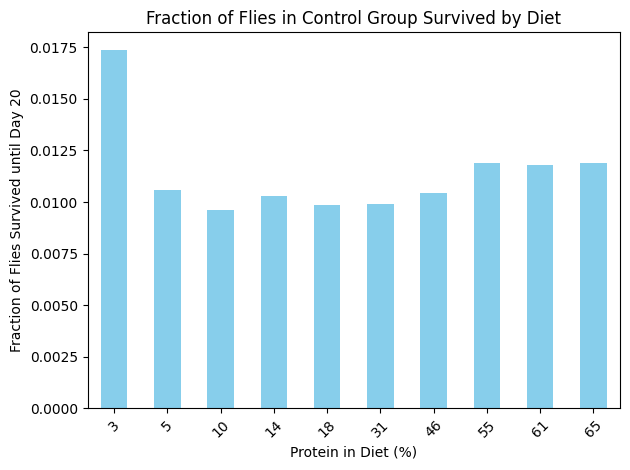

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' contains your dataset loaded into a Pandas DataFrame

# Filter the DataFrame for the control group
control_data = data[data['Treat'] == 'Control']

# Filter for flies that survived until day 20 and remove 'NA' values
survived_day_20 = control_data[(
    control_data['Date'] == 20) & (control_data['Dead'] == 0)]

# Group by 'Protein' and count the number of surviving flies for each diet
survived_by_diet = survived_day_20.groupby('Protein')['Dead'].count()

# Calculate the total number of flies in the control group for each diet
total_flies_by_diet = control_data.groupby(
    'Protein')['Dead'].apply(lambda x: x.count())

# Calculate the fraction of flies survived for each diet
fraction_survived_by_diet = survived_by_diet / total_flies_by_diet

# Plotting the bar chart
fraction_survived_by_diet.plot(kind='bar', color='skyblue')
plt.xlabel('Protein in Diet (%)')
plt.ylabel('Fraction of Flies Survived until Day 20')
plt.title('Fraction of Flies in Control Group Survived by Diet')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

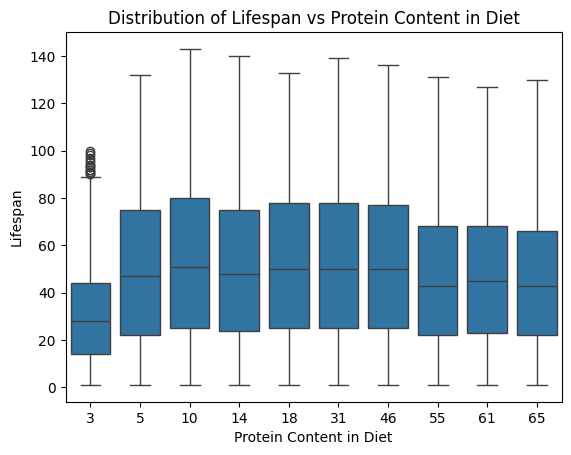

(126.01728408427633,
 1.7865017659334805e-234,
 'Reject the null hypothesis. There is a significant difference in average lifespan based on protein content in the diet.')

In [35]:
from scipy.stats import f_oneway
import seaborn as sns

# Filter the dataframe for the control group
control_group = data[data['Treat'].isin(['Control', 'Sham'])]
control_group = control_group.dropna(subset=['Dead'])

# Create box plots
sns.boxplot(x='Protein', y='Date', data=control_group)
plt.xlabel('Protein Content in Diet')
plt.ylabel('Lifespan')
plt.title('Distribution of Lifespan vs Protein Content in Diet')
plt.show()

# Perform statistical test

protein_groups = []
for protein, group in control_group.groupby('Protein'):
    protein_groups.append(group['Date'].values)

f_statistic, p_value = f_oneway(*protein_groups)

p_value_threshold = 0.05
if p_value < p_value_threshold:
    conclusion = "Reject the null hypothesis. There is a significant difference in average lifespan based on protein content in the diet."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in average lifespan based on protein content in the diet."

f_statistic, p_value, conclusion

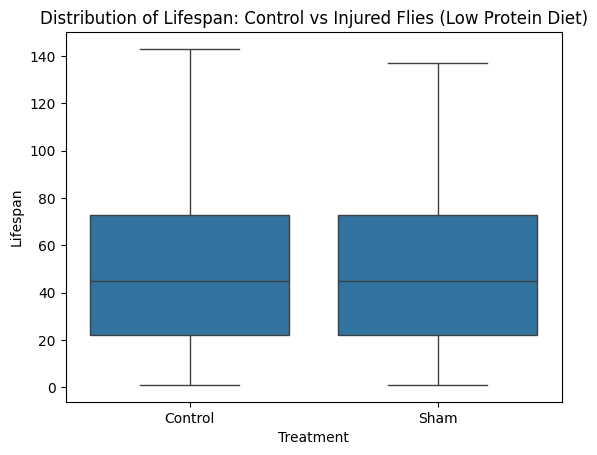

(1.1468493855170954,
 0.25146048516370345,
 'Fail to reject the null hypothesis. There is no significant difference in average lifespan of control vs injured flies under a low protein diet.')

In [36]:
# Filter the dataframe for control and injured flies under low protein diet
from scipy.stats import ttest_ind
low_protein_df = data[(data['Treat'].isin(['Control', 'Sham'])) & (
    data['Protein'] < 30)]

# Create box plots
sns.boxplot(x='Treat', y='Date', data=low_protein_df)
plt.xlabel('Treatment')
plt.ylabel('Lifespan')
plt.title('Distribution of Lifespan: Control vs Injured Flies (Low Protein Diet)')
plt.show()

# Perform statistical test

control_lifespan = low_protein_df[low_protein_df['Treat'] == 'Control']['Date']
injured_lifespan = low_protein_df[low_protein_df['Treat'] == 'Sham']['Date']

t_statistic, p_value = ttest_ind(control_lifespan, injured_lifespan)

p_value_threshold = 0.05
if p_value < p_value_threshold:
    conclusion = "Reject the null hypothesis. There is a significant difference in average lifespan of control vs injured flies under a low protein diet."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in average lifespan of control vs injured flies under a low protein diet."

t_statistic, p_value, conclusion

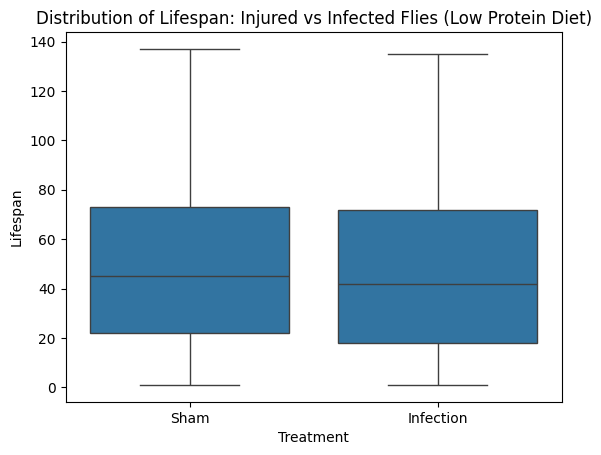

(3.1839988374113544,
 0.0014561515152245737,
 'Reject the null hypothesis. There is a significant difference in average lifespan of injured and infected flies under a low protein diet.')

In [37]:
# Filter the dataframe for injured and infected flies under low protein diet
low_protein_df = data[(data['Treat'].isin(['Sham', 'Infection']))
                    & (data['Protein'] < 30)]

# Create box plots
sns.boxplot(x='Treat', y='Date', data=low_protein_df)
plt.xlabel('Treatment')
plt.ylabel('Lifespan')
plt.title('Distribution of Lifespan: Injured vs Infected Flies (Low Protein Diet)')
plt.show()

# Perform statistical test
injured_lifespan = low_protein_df[low_protein_df['Treat'] == 'Sham']['Date']
infected_lifespan = low_protein_df[low_protein_df['Treat']
                                   == 'Infection']['Date']

t_statistic, p_value = ttest_ind(injured_lifespan, infected_lifespan)

p_value_threshold = 0.05
if p_value < p_value_threshold:
    conclusion = "Reject the null hypothesis. There is a significant difference in average lifespan of injured and infected flies under a low protein diet."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in average lifespan of injured and infected flies under a low protein diet."

t_statistic, p_value, conclusion

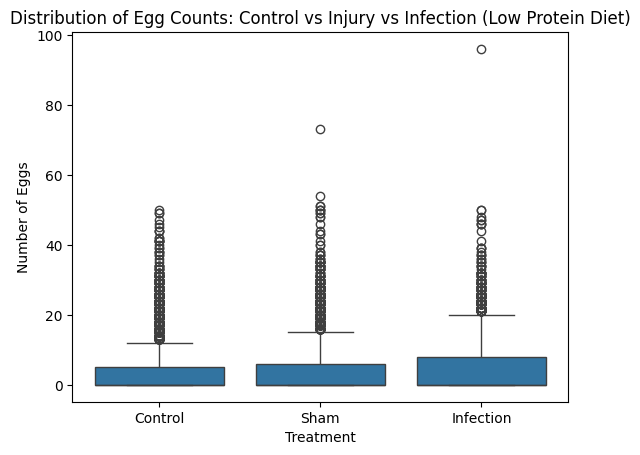

(nan, nan)

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for low protein diet and the three treatment groups
low_protein_df = data[(data['Protein'] < 30) & (
    data['Treat'].isin(['Control', 'Sham', 'Infection']))]

# Create box plots
sns.boxplot(x='Treat', y='Eggs', data=low_protein_df)
plt.xlabel('Treatment')
plt.ylabel('Number of Eggs')
plt.title(
    'Distribution of Egg Counts: Control vs Injury vs Infection (Low Protein Diet)')

# Fit linear regression model manually
x_vals = low_protein_df['Treat'].map(
    {'Control': 0, 'Sham': 1, 'Infection': 2}).values
y_vals = low_protein_df['Eggs'].values

# Calculate the mean of x and y values
x_mean = np.mean(x_vals)
y_mean = np.mean(y_vals)

# Calculate the deviations from the mean
x_deviation = x_vals - x_mean
y_deviation = y_vals - y_mean

# Calculate the sum of squared deviations
x_squared_deviation = np.sum(x_deviation ** 2)
xy_deviation_product = np.sum(x_deviation * y_deviation)

# Calculate the slope and intercept of the regression line
slope = xy_deviation_product / x_squared_deviation
intercept = y_mean - slope * x_mean

# Calculate the predicted y values
y_predicted = intercept + slope * x_vals

# Plot the regression line
plt.plot(x_vals, y_predicted, color='red')

plt.show()

# Print the slope and intercept
slope, intercept

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Filter the dataframe for low protein diet and the three treatment groups
low_protein_df = data[(data['Protein'] < 30) & (
    data['Treat'].isin(['Control', 'Sham', 'Infection']))]

# Drop rows with missing values in 'Eggs' column
low_protein_df = low_protein_df.dropna(subset=['Eggs'])

# Convert categorical data to numerical values
low_protein_df['Treat'] = low_protein_df['Treat'].map(
    {'Control': 0, 'Sham': 1, 'Infection': 2})

# Prepare the data for sklearn
X = low_protein_df[['Treat']]
y = low_protein_df['Eggs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model using training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_predicted = model.predict(X_test)

# Calculate R-squared and adjusted R-squared for the test set
y_mean = np.mean(y_test)
n = len(y_test)
k = X_test.shape[1]

# R-squared
SSR = np.sum((y_predicted - y_mean) ** 2)
SST = np.sum((y_test - y_mean) ** 2)
R_squared = SSR / SST

# Adjusted R-squared
adjusted_R_squared = 1 - (1 - R_squared) * ((n - 1) / (n - k - 1))

# Print R-squared and adjusted R-squared
print("R-squared:", R_squared)
print("Adjusted R-squared:", adjusted_R_squared)

R-squared: 0.0038055486844022768
Adjusted R-squared: 0.0034081835263187754


/tmp/ipykernel_123872/603531680.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_protein_df['Treat'] = low_protein_df['Treat'].map(


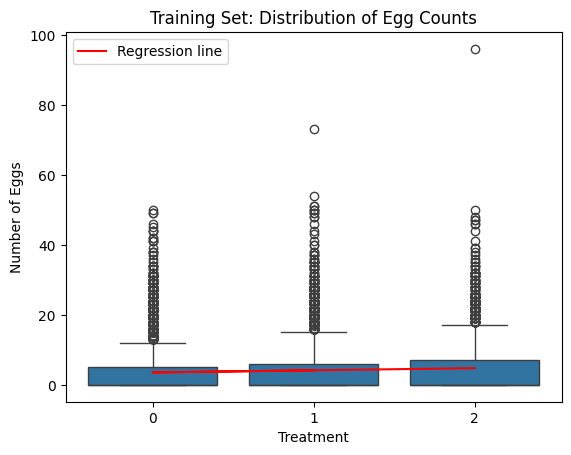

Intercept: 3.565603910547476
Slope: 0.6148989042008862
R-squared: 0.007278056980728587


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Filter the dataframe for low protein diet and the three treatment groups
low_protein_df = data[(data['Protein'] < 30) & (
    data['Treat'].isin(['Control', 'Sham', 'Infection']))]

# Convert categorical data to numerical values
low_protein_df['Treat'] = low_protein_df['Treat'].map(
    {'Control': 0, 'Sham': 1, 'Infection': 2})

# Drop rows with missing values in 'Eggs' column
low_protein_df = low_protein_df.dropna(subset=['Eggs'])

# Prepare the data for sklearn
X = low_protein_df[['Treat']]
y = low_protein_df['Eggs']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create box plots for training data
sns.boxplot(x='Treat', y='Eggs', data=pd.concat([X_train, y_train], axis=1))
plt.xlabel('Treatment')
plt.ylabel('Number of Eggs')
plt.title('Training Set: Distribution of Egg Counts')

# Fit linear regression model using training data
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate predicted values from the model using test data
y_predicted = model.predict(X_test)

# Plot the regression line on the training set
plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')
plt.legend()
plt.show()

# Print regression summary on test set
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("R-squared:", model.score(X_test, y_test))
# Further statistical analysis as needed

Summary of Results:
Intercept: The estimated average number of eggs produced when the treatment severity is at its lowest level (control) is approximately 3.57. However, this value needs careful interpretation and may not carry substantial practical significance alone.

Slope: For each unit increase in the severity of treatment (moving from control to injury or injury to infection), there is a predicted increase of approximately 0.615 eggs produced on average. This small slope suggests a marginal change in egg production associated with the severity of treatment.

R-squared: The R-squared value of approximately 0.0073 indicates that only about 0.73% of the variability in the number of eggs produced can be explained by the linear relationship with the ordinal variable representing treatment severity. This suggests an extremely weak linear association between treatment severity and the number of eggs produced under a low protein diet.

Conclusion:
Based on the linear regression model:

The severity of treatment, as represented by the ordinal variable, does not appear to be a significant predictor of the number of eggs produced under a low protein diet.
The model, considering treatment severity alone, is inadequate in explaining or predicting variations in egg production.
Other unaccounted factors or variables not included in this analysis may have a more substantial influence on egg production, warranting further investigation.
Overall, the model's poor fit (indicated by the extremely low R-squared value) suggests that the relationship between treatment severity and egg production is very weak, and additional factors might be crucial in understanding and predicting egg production accurately. Further research considering other variables or exploring nonlinear relationships may yield better insights into the factors affecting egg production.